In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import Imputer, StandardScaler
from io import StringIO


In [2]:
import os
path = os.getcwd()
print(path)

/Users/jdear/HBSDissertation


In [3]:
os.chdir('/Users/jdear/HBSDissertation')
path = os.getcwd()
print(path)

/Users/jdear/HBSDissertation


In [4]:
# Read Success Prog data
SProg = pd.read_csv('/Users/jdear/HBSDissertation/SuccessProgMapped.csv')
SProg.head(5)

,Unnamed: 0,uuid,SProgId,Name_y,Type__c,Engagement_Type__c,Status__c,Account__r,Account__r.CSG_Coverage__c,Delivery_Method__c,Event_Type__c,RecordType.Name
0,0,b3f57495-67b9-4bb1-89b5-013f58be041b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,850699e0-956f-42d1-97e0-f49aa41a05a6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,95b17569-502a-491d-a2ff-85b66d206df4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,93d798a3-9bb1-46b1-a9b9-a93c1e53f706,aCb3y0000043fUwCAI,ENG-68777230,NaN,NaN,NaN,[Account],Top,Community,NaN,API Only
4,4,93d798a3-9bb1-46b1-a9b9-a93c1e53f706,aCb3y000006Sm5WCAS,ENG-76170288,NaN,NaN,NaN,[Account],Top,Community,NaN,API Only


In [5]:
# tidyup
del SProg['Unnamed: 0']
SProg.head(5)

,uuid,SProgId,Name_y,Type__c,Engagement_Type__c,Status__c,Account__r,Account__r.CSG_Coverage__c,Delivery_Method__c,Event_Type__c,RecordType.Name
0,b3f57495-67b9-4bb1-89b5-013f58be041b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,850699e0-956f-42d1-97e0-f49aa41a05a6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,95b17569-502a-491d-a2ff-85b66d206df4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93d798a3-9bb1-46b1-a9b9-a93c1e53f706,aCb3y0000043fUwCAI,ENG-68777230,NaN,NaN,NaN,[Account],Top,Community,NaN,API Only
4,93d798a3-9bb1-46b1-a9b9-a93c1e53f706,aCb3y000006Sm5WCAS,ENG-76170288,NaN,NaN,NaN,[Account],Top,Community,NaN,API Only


In [6]:
# add counter
SProg['Sprog Count'] = 1
SProg.head(5)

,uuid,SProgId,Name_y,Type__c,Engagement_Type__c,Status__c,Account__r,Account__r.CSG_Coverage__c,Delivery_Method__c,Event_Type__c,RecordType.Name,Sprog Count
0,b3f57495-67b9-4bb1-89b5-013f58be041b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,850699e0-956f-42d1-97e0-f49aa41a05a6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,95b17569-502a-491d-a2ff-85b66d206df4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,93d798a3-9bb1-46b1-a9b9-a93c1e53f706,aCb3y0000043fUwCAI,ENG-68777230,NaN,NaN,NaN,[Account],Top,Community,NaN,API Only,1
4,93d798a3-9bb1-46b1-a9b9-a93c1e53f706,aCb3y000006Sm5WCAS,ENG-76170288,NaN,NaN,NaN,[Account],Top,Community,NaN,API Only,1


In [7]:
SProg.to_csv('SProgCounter.csv')

In [8]:
SProgPivot1 = pd.pivot_table(SProg, values='Sprog Count', index=['RecordType.Name'], aggfunc= np.sum)
SProgPivot1

,Sprog Count
RecordType.Name,
API Only,351243
Adoption,4
Community Summary,930070
Generic General Engagement,10425
Stream,12824
Trailhead Aggregate,54128
Webinar Participant,26686


In [9]:
SProgPivot2 = pd.pivot_table(SProg, values='Sprog Count', index=['Delivery_Method__c'], aggfunc= np.sum)
SProgPivot2

,Sprog Count
Delivery_Method__c,
ADR,2002
Accelerator,1
Admin Assist,4612
Community,614617
Customer Success Request,4729
Digital Campaigns,10066
Einstein Assessor,242
Email,1730
Executive/Critical Incidents,16


In [10]:
SProgPivot2.hist

<bound method hist_frame of                               Sprog Count
Delivery_Method__c                       
ADR                                  2002
Accelerator                             1
Admin Assist                         4612
Community                          614617
Customer Success Request             4729
Digital Campaigns                   10066
Einstein Assessor                     242
Email                                1730
Executive/Critical Incidents           16
High Touch                           1095
In Person Training                   1948
In-App                                612
JavaScript Buttons Check               35
Live and Virtual Events               350
MANUAL_PROD                           893
Optimizer                             654
Readiness Check                       481
Renewal Touch                        4759
SCHEDULED_PROD                       1159
Success Apps                          606
Success Assessment                     98
Succes

In [11]:
SProgPivot2.describe()

,Sprog Count
count,29.000000
mean,47771.620690
std,161289.676171
min,1.000000
25%,295.000000
50%,893.000000
75%,4729.000000
max,642284.000000


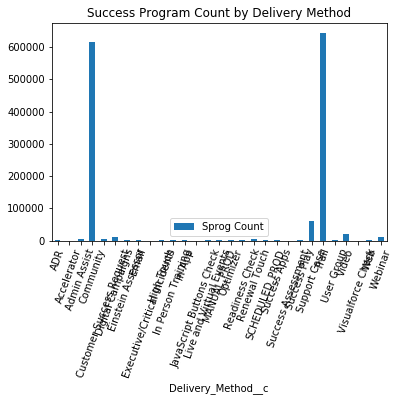

In [12]:
# Draw a vertical bar chart

SProgPivot2.plot.bar(rot=70, title="Success Program Count by Delivery Method");


In [13]:
skewValue = SProgPivot2.skew(axis=0)

print("SProgPivot2:")
print(SProgPivot2)

print("Skew:")
print(skewValue)

SProgPivot2:
                              Sprog Count
Delivery_Method__c                       
ADR                                  2002
Accelerator                             1
Admin Assist                         4612
Community                          614617
Customer Success Request             4729
Digital Campaigns                   10066
Einstein Assessor                     242
Email                                1730
Executive/Critical Incidents           16
High Touch                           1095
In Person Training                   1948
In-App                                612
JavaScript Buttons Check               35
Live and Virtual Events               350
MANUAL_PROD                           893
Optimizer                             654
Readiness Check                       481
Renewal Touch                        4759
SCHEDULED_PROD                       1159
Success Apps                          606
Success Assessment                     98
Success Play         

In [14]:
SProgPivot2.to_csv('SProgPivot.csv')

In [15]:
SProgPivot3 = pd.pivot_table(SProg, values='Sprog Count', index=['uuid','Delivery_Method__c' ], aggfunc= np.sum)
SProgPivot3.head(20)

Sprog Count
uuid                                 Delivery_Method__c             
00050d9a-033a-4d10-adc2-57298e67b979 Digital Campaigns             2
                                     Support Case                  2
                                     Trail                         4
0009857d-e0aa-4edc-a5e0-398ee567c2a4 Email                         1
0013427b-7da5-45e8-8b4e-173198f9d3f9 Support Case                  1
                                     Video                         3
00154cb7-51d7-4413-a7e6-178bafb21b80 Trail                         1
001ee153-2b44-45d1-bbc7-6b8114deac57 Support Case                  2
                                     Trail                        13
0024890c-5e91-45a7-bb37-bd568b5d5c51 Support Case                  1
00270b40-f644-43f5-89ab-03e0e0623233 Community                    10
                                     Renewal Touch                 2
                                     Trail                        17
002997df-cc6c-4cc3-b9a6-cc54b84762a7 Community                     6
                                     Trail                        39
002a8ec1-d894-4484-8350-5f26ec311eb4 Renewal Touch                 2
002c5340-7e72-458d-996e-43e886f69c45 Community                    49
                                     Trail                         1
                                     Video                         5
002ce9d4-90d1-4b65-9459-a82a48e7fbe9 Trail                         4

In [16]:
# Generate pivot table showing Num,ber of each type of SProg per account
SprogPivot4 = SProgPivot3.pivot_table(index=["uuid"], 
                    columns='Delivery_Method__c', 
                    values='Sprog Count')
SprogPivot4.head()

Delivery_Method__c,ADR,Accelerator,Admin Assist,Community,Customer Success Request,Digital Campaigns,Einstein Assessor,Email,Executive/Critical Incidents,High Touch,...,Success Apps,Success Assessment,Success Play,Support Case,Trail,User Group,Video,Visualforce Check,Web,Webinar
uuid,,,,,,,,,,,,,,,,,,,,,
00050d9a-033a-4d10-adc2-57298e67b979,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN
0009857d-e0aa-4edc-a5e0-398ee567c2a4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0013427b-7da5-45e8-8b4e-173198f9d3f9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN
00154cb7-51d7-4413-a7e6-178bafb21b80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
001ee153-2b44-45d1-bbc7-6b8114deac57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,13.0,NaN,NaN,NaN,NaN,NaN


In [17]:
# Add column for total SProgs per account
SprogPivot4['Total Sprogs']= SprogPivot4.sum(axis=1)
SprogPivot4.head()

Delivery_Method__c,ADR,Accelerator,Admin Assist,Community,Customer Success Request,Digital Campaigns,Einstein Assessor,Email,Executive/Critical Incidents,High Touch,...,Success Assessment,Success Play,Support Case,Trail,User Group,Video,Visualforce Check,Web,Webinar,Total Sprogs
uuid,,,,,,,,,,,,,,,,,,,,,
00050d9a-033a-4d10-adc2-57298e67b979,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,8.0
0009857d-e0aa-4edc-a5e0-398ee567c2a4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
0013427b-7da5-45e8-8b4e-173198f9d3f9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,4.0
00154cb7-51d7-4413-a7e6-178bafb21b80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
001ee153-2b44-45d1-bbc7-6b8114deac57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,13.0,NaN,NaN,NaN,NaN,NaN,15.0


In [18]:
SprogPivot4.describe()

Delivery_Method__c,ADR,Accelerator,Admin Assist,Community,Customer Success Request,Digital Campaigns,Einstein Assessor,Email,Executive/Critical Incidents,High Touch,...,Success Assessment,Success Play,Support Case,Trail,User Group,Video,Visualforce Check,Web,Webinar,Total Sprogs
count,820.000000,1.0,194.000000,5043.000000,1832.000000,2748.000000,143.000000,901.000000,14.000000,302.000000,...,46.000000,75.000000,7088.000000,6531.000000,94.000000,2354.000000,100.000000,333.000000,2460.000000,12768.000000
mean,2.441463,1.0,23.773196,121.875273,2.581332,3.663028,1.692308,1.920089,1.142857,3.625828,...,2.130435,2.773333,8.422827,98.343898,3.138298,8.958369,1.450000,1.636637,4.230081,108.503838
std,2.216651,NaN,188.446004,596.794282,3.027805,5.077914,1.464273,1.436913,0.363137,9.486258,...,0.618554,1.607191,42.109618,4194.120417,4.533273,23.470356,0.946818,1.322913,9.906471,3049.416028
min,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.0,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000
50%,2.000000,1.0,1.000000,22.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,7.000000,2.000000,4.000000,1.000000,1.000000,2.000000,11.000000
75%,3.000000,1.0,4.000000,71.000000,3.000000,4.000000,2.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,8.000000,20.000000,3.000000,8.000000,1.000000,2.000000,4.000000,37.000000
max,37.000000,1.0,2586.000000,25408.000000,35.000000,76.000000,12.000000,11.000000,2.000000,93.000000,...,4.000000,8.000000,2949.000000,335136.000000,41.000000,808.000000,6.000000,12.000000,327.000000,335234.000000


In [20]:
# Add count for High Touch 
SprogPivot4['High Count'] = SprogPivot4.fillna(0)['ADR'] + SprogPivot4.fillna(0)['Accelerator'] + SprogPivot4.fillna(0)['Admin Assist'] + SprogPivot4.fillna(0)['Customer Success Request'] + SprogPivot4.fillna(0)['Executive/Critical Incidents'] + SprogPivot4.fillna(0)['High Touch'] + SprogPivot4.fillna(0)['In Person Training'] + SprogPivot4.fillna(0)['Success Assessment'] 


In [21]:
# Add count for Low Touch 
SprogPivot4['Low Count'] = SprogPivot4.fillna(0)['Live and Virtual Events'] + SprogPivot4.fillna(0)['MANUAL_PROD'] + SprogPivot4.fillna(0)['Renewal Touch'] + SprogPivot4.fillna(0)['SCHEDULED_PROD'] + SprogPivot4.fillna(0)['Success Play'] + SprogPivot4.fillna(0)['Support Case'] + SprogPivot4.fillna(0)['User Group'] + SprogPivot4.fillna(0)['Webinar'] 


In [22]:
# Add count for Tech Touch frame['c'] = frame.fillna(0)['a'] + frame.fillna(0)['b']
SprogPivot4['Tech Count'] = SprogPivot4.fillna(0)['Community'] + SprogPivot4.fillna(0)['Digital Campaigns'] + SprogPivot4.fillna(0)['Einstein Assessor'] + SprogPivot4.fillna(0)['Email'] + SprogPivot4.fillna(0)['In-App'] + SprogPivot4.fillna(0)['JavaScript Buttons Check'] + SprogPivot4.fillna(0)['Optimizer'] + SprogPivot4.fillna(0)['Readiness Check'] +  SprogPivot4.fillna(0)['Success Apps'] + SprogPivot4.fillna(0)['Trail'] + SprogPivot4.fillna(0)['Video'] 
SprogPivot4.head()

Delivery_Method__c,ADR,Accelerator,Admin Assist,Community,Customer Success Request,Digital Campaigns,Einstein Assessor,Email,Executive/Critical Incidents,High Touch,...,Trail,User Group,Video,Visualforce Check,Web,Webinar,Total Sprogs,High Count,Low Count,Tech Count
uuid,,,,,,,,,,,,,,,,,,,,,
00050d9a-033a-4d10-adc2-57298e67b979,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,8.0,0.0,2.0,6.0
0009857d-e0aa-4edc-a5e0-398ee567c2a4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0
0013427b-7da5-45e8-8b4e-173198f9d3f9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,4.0,0.0,1.0,3.0
00154cb7-51d7-4413-a7e6-178bafb21b80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0
001ee153-2b44-45d1-bbc7-6b8114deac57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,NaN,NaN,NaN,NaN,NaN,15.0,0.0,2.0,13.0


In [23]:
SprogPivot4.to_csv('AcctSProgPivot.csv')